In [1]:
# Tutorial 8, Analysis of quantic trajectories of atoms in a cavity to infer the numbers of photons in the cavity

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import numpy.matlib
import csv
import pandas as pd

#2 files containing  atomic detections in spin state 0 (ground state) 'stateG.dat' or spin state  1 'stateE.dat'


# they are a matrix M x T where M=2000 is the number of independent experiments
#each  of such trajectory  (rows of the matrix) having  T=10000 detections d, having  d=0 if no atom 
#have been detected or d=1,2,3 indicating the number of atoms detecyed in the corresponding spin=0 or 1 state.

#Mex=M
#T=Md

T=10000
M=2000

#Open and read the files:

f0=open("Data/stateG.dat")

l=0

de=np.zeros((M,T)).astype(int)
for row in csv.reader(f0):
    de[l,:]=row
    l=l+1
    
f1=open("Data/stateE.dat")

l=0
dg=np.zeros((M,T)).astype(int)
for row in csv.reader(f1):
    dg[l,:]=row
    l=l+1
    





In [2]:
unique_phi=np.array([-0.836, 0.033, 0.905, 1.442])
phi=np.tile(unique_phi, int(T/np.shape(unique_phi)[0]))

In [3]:
A=0.551
B=0.698
theta=0.233*np.pi
def P_g(phi, n) : return (A-B/2*np.cos(n*theta+phi))
def P_e(phi, n) : return ((1-A) + B/2*np.cos(n*theta+phi))

In [16]:
renorm=500
n_range=np.arange(8)


def likelihood(dg, de, phi, n):
    temp= np.log(P_g(phi, n))*dg + np.log(P_e(phi, n))*de
    return np.exp(temp + renorm)

def Z(dg, de, phi):
    c=0
    for n in range(8):
        c+=likelihood(dg, de, phi, n)
    return c

def posterior(dg, de, phi, n):
    post= likelihood(dg, de, phi, n)/Z(dg, de, phi)
    return post

def experiment(index, dg, de, phi):
    post=[]
    for t in range(T):
        post.append(posterior(dg[index,t], de[index,t], phi[t], n_range))
    return post



(10000,)

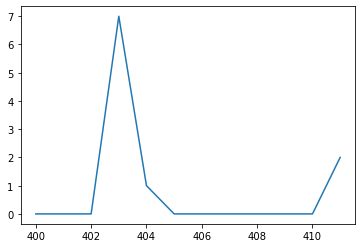

In [30]:
n_range=np.arange(8)
plt.plot(np.arange(400,400+12), np.argmax(experiment(1163, dg, de, phi),axis=1)[400:400+12])